# **Tugas Praktikum - Clustering**

- Naresh Pratista
- 2141720057


Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [1]:
# Import Library

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Load data

data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Pilih fitur yang relevan
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# Mencari jumlah cluster yang optimal
cluster_range = range(2, 11)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

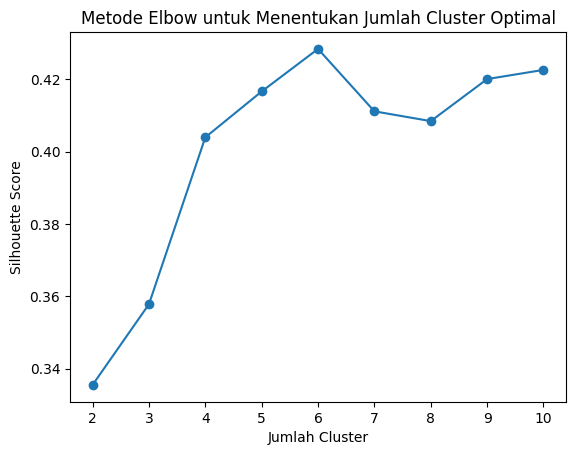

In [7]:
# Plot metode elbow
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [8]:
# Pilih jumlah cluster yang optimal
num_clusters = 6

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


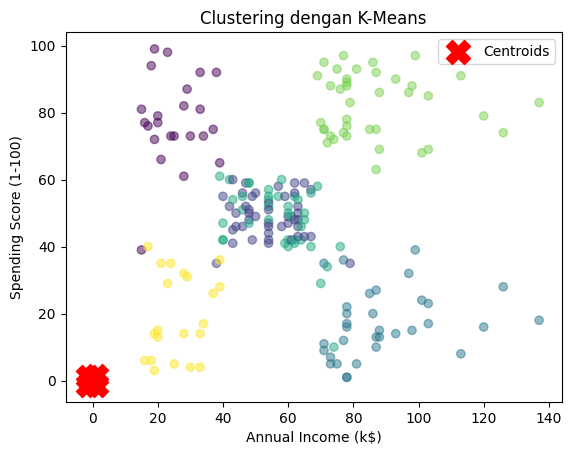

In [10]:
# Visualisasi hasil clustering
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering dengan K-Means')
plt.legend()
plt.show()

**Model SOM dengan Citra**

In [14]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=503c59d30a2702cce6ebcd30c614cd97eef1602551f63d0117f8332f7cfbd7db
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from PIL import Image

In [16]:
# Konversi citra menjadi dataset
def create_dataset(image):
    width, height = image.size
    pixels = np.array(image.getdata())
    return pixels / 255.0

# Konversi hasil SOM menjadi citra yang sudah disegmentasi
def create_segmented_image(image_data, som, width, height):
    segmented_image = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixel = image_data[i * width + j]
            winner = som.winner(pixel)
            segmented_image[i, j] = som.get_weights()[winner[0], winner[1]] * 255

    return segmented_image


In [17]:
image_path = "a380.jpg"
original_image = Image.open(image_path)

In [18]:
# Konversi citra menjadi dataset
image_data = create_dataset(original_image)

som_grid_size = (20, 20)

som = MiniSom(som_grid_size[0], som_grid_size[1], image_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(image_data, 1000)

segmented_image = create_segmented_image(image_data, som, original_image.width, original_image.height)

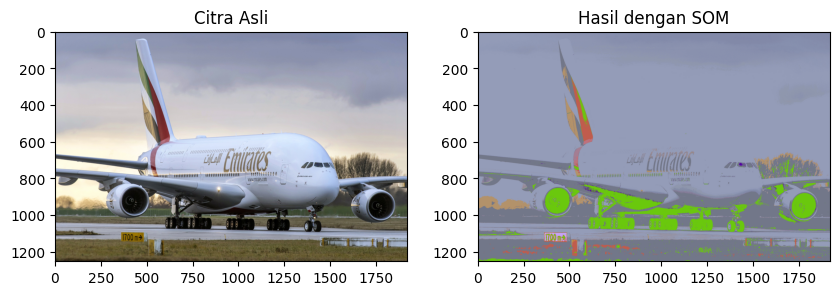

In [20]:
# Tampilkan citra asli dan hasil segmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Citra Asli")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Hasil dengan SOM")

plt.show()